In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
! pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=2338e772b1d88913630b029420494ccc3c49430f3ac81e72fafd29947cf6bb91
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [2]:
!pip install --upgrade afinn

In [3]:
import pkg_resources

version = pkg_resources.get_distribution("afinn").version
print("Versión de AFINN:", version)

Versión de AFINN: 0.1


In [4]:
!pip show afinn

Name: afinn
Version: 0.1
Summary: AFINN sentiment analysis
Home-page: https://github.com/fnielsen/afinn
Author: Finn Aarup Nielsen
Author-email: faan@dtu.dk
License: GPL
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [5]:
import pandas as pd
import string
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from afinn import Afinn
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from transformers import pipeline, AutoTokenizer

In [6]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


####**AFINN**

In [7]:
def preprocess_for_afinn(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)
        text = re.sub(r"\d+", "", text)
        text = text.strip()
    return text  # no quitamos puntuación ni pasamos a minúsculas

In [8]:
df_afinn=pd.read_csv('translated_reviews.csv')

In [9]:
df_afinn=df_afinn.dropna(subset=['translated_review'])

In [10]:
df_afinn.shape

(1190445, 8)

In [11]:
df_afinn['clean_review']=df_afinn['translated_review'].apply(preprocess_for_afinn)

In [12]:
afinn = Afinn()

In [13]:
df_afinn['Sentiment_Score_Afinn']=df_afinn['clean_review'].apply(lambda x: afinn.score(x) if pd.notnull(x) else None)

In [14]:
df_afinn

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,translated_review,clean_review,Sentiment_Score_Afinn
0,21853,21051116,2014-10-10,8506071,Pedro Abel,"Mi experiencia en casa de Adel fue buena, aunq...",es,"My experience in Adel's house was good, althou...","My experience in Adel's house was good, althou...",6.0
1,21853,21268157,2014-10-13,19062863,Olga,Adel is a very warm person and thoughtful! He...,en,Adel is a very warm person and thoughtful! He...,Adel is a very warm person and thoughtful! He ...,11.0
2,21853,22527396,2014-11-09,6099461,Hugh,Adel is an exceptionally welcoming host. I was...,en,Adel is an exceptionally welcoming host. I was...,Adel is an exceptionally welcoming host. I was...,10.0
3,21853,22684525,2014-11-11,23357657,Sendy,"Adel fue muy amable, incluso el día de mi lleg...",es,"Adel was very friendly, even the day of my arr...","Adel was very friendly, even the day of my arr...",11.0
4,21853,22871843,2014-11-16,4072731,Nati,Abdel ha sido un magnífico anfitrión y la mejo...,es,Abdel has been a magnificent host and the best...,Abdel has been a magnificent host and the best...,15.0
...,...,...,...,...,...,...,...,...,...,...
1205941,1364524253446459367,1370233593987416123,2025-03-05,95293499,Paula,Me ha encantado. El piso está precioso muy nue...,es,I loved it. The floor is very new and the loca...,I loved it. The floor is very new and the loca...,2.0
1205942,1364616759503109256,1368127111176342942,2025-03-02,368146996,Clémentine,"Très bon séjour chez Juan, le logement était p...",fr,"Very good stay with Juan, the accommodation wa...","Very good stay with Juan, the accommodation wa...",14.0
1205943,1365007887657848515,1370244234430465527,2025-03-05,283312107,Hernan Enrique,Recomendable para una persona que quiere hacer...,es,Recommended for a person who wants to do a sho...,Recommended for a person who wants to do a sho...,2.0
1205944,1365007887657848515,1373818429800403177,2025-03-10,184521825,Carlos,"Es una Host súper amable, fue atenta en todo m...",es,"It is a super friendly host, it was attentive ...","It is a super friendly host, it was attentive ...",8.0


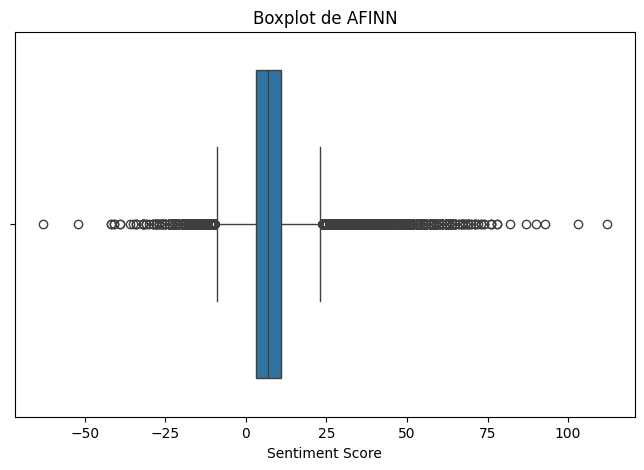

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_afinn["Sentiment_Score_Afinn"])
plt.xlabel("Sentiment Score")
plt.title("Boxplot de AFINN")
plt.show()

In [16]:
media_sentimiento_Afinn = df_afinn.groupby('listing_id', as_index=False)['Sentiment_Score_Afinn'].mean()

In [17]:
media_sentimiento_Afinn

,listing_id,Sentiment_Score_Afinn
0,21853,10.030303
1,30320,9.859649
2,30959,4.875000
3,40916,7.571429
4,62423,8.805430
...,...,...
20053,1365007887657848515,5.000000
20054,1366534590465861868,5.000000
20055,1366853173044267909,3.000000
20056,1368304377290123314,2.000000


In [ ]:
#media_sentimiento_Afinn.to_csv('sentiment_score_afinn.csv')